In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\Misc\\Programming\\Machine & Deep Learning\\Deep Learning\\Sample Data\\Recurrent Neural Networks\\Google_Stock_Price_Train.csv")
dataset.shape

(1258, 6)

In [3]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_data = dataset.iloc[:,1:2].values
train_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_data_sc = sc.fit_transform(train_data)
train_data_sc

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
xtrain = []
ytrain = []

for i in range(60, len(train_data_sc)):
  xtrain.append(train_data_sc[i-60:i,0])
  ytrain.append(train_data_sc[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [7]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

In [8]:
xtrain.shape

(1198, 60, 1)

## Building Model

In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape = (xtrain.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))

In [11]:
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

In [12]:
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

In [13]:
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.2))

In [14]:
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer="adam", loss='mean_squared_error')

In [15]:
model.fit(xtrain, ytrain, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 10s 77ms/step - loss: 0.0395
Epoch 2/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0068
Epoch 4/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0041
Epoch 13/100
38/38 [====

38/38 [==============================] - 3s 73ms/step - loss: 0.0016


In [16]:
dataset_test = pd.read_csv("C:\\Users\\hp\\Desktop\\Misc\\Programming\\Machine & Deep Learning\\Deep Learning\\Sample Data\\Recurrent Neural Networks\\Google_Stock_Price_Test.csv")
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [20]:
dataset_total = pd.concat((dataset["Open"],dataset_test["Open"]), axis=0)
dataset_total.shape

(1278,)

In [21]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [23]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [24]:
inputs = sc.transform(inputs)

In [25]:
xtest = []
for i in range(60, 80):
    xtest.append(inputs[i-60:i,0])

xtest = np.array(xtest)
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

ypred = model.predict(xtest)
ypred = sc.inverse_transform(ypred)
ypred

array([[771.65295],
       [768.94434],
       [769.1941 ],
       [770.5213 ],
       [773.6859 ],
       [779.2023 ],
       [784.1426 ],
       [786.04596],
       [786.3267 ],
       [786.2181 ],
       [786.23645],
       [786.2659 ],
       [786.2886 ],
       [786.85236],
       [787.681  ],
       [791.9533 ],
       [798.3066 ],
       [805.0576 ],
       [808.5207 ],
       [804.33453]], dtype=float32)

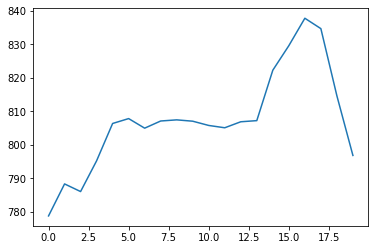

In [29]:
ytest = dataset_test["Open"]
plt.plot(ytest)

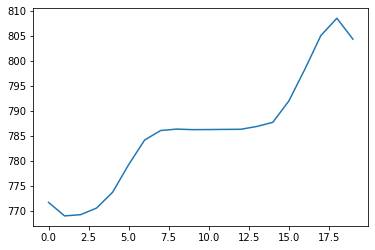

In [28]:
plt.plot(ypred)